# Importing Requisite Libraries

In [49]:
import numpy as np 
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


# Reading the Data

In [39]:
data = pd.read_csv('/kaggle/input/amazon-fine-food-reviews/Reviews.csv')

In [40]:
data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [41]:
# first_50_texts = data['Text'].head(50)

# # Print each text individually
# for idx, text in enumerate(first_50_texts):
#     print(f"{text}")

# Preprocessing and EDA

In [42]:
def preprocess_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenization
    words = word_tokenize(text)
    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

In [43]:
data['Text'] = data['Text'].apply(preprocess_text)

In [52]:
# Function to plot bar chart of most frequently occurring words
def plot_most_common_words_bar_chart(text_data, top_n=10):
    word_list = ' '.join(text_data).split()
    word_counts = Counter(word_list).most_common(top_n)
    words, counts = zip(*word_counts)

    plt.figure(figsize=(12, 6))
    plt.bar(words, counts, color='skyblue')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(f'Top {top_n} Most Common Words')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Function to create word cloud
def create_word_cloud(text_data):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text_data))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

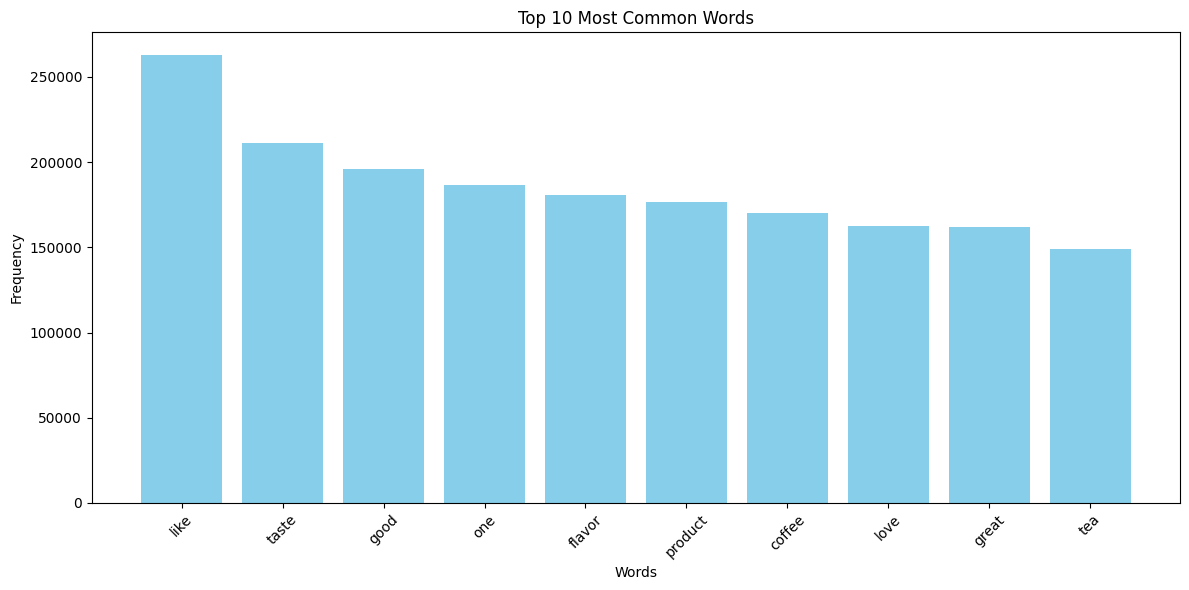

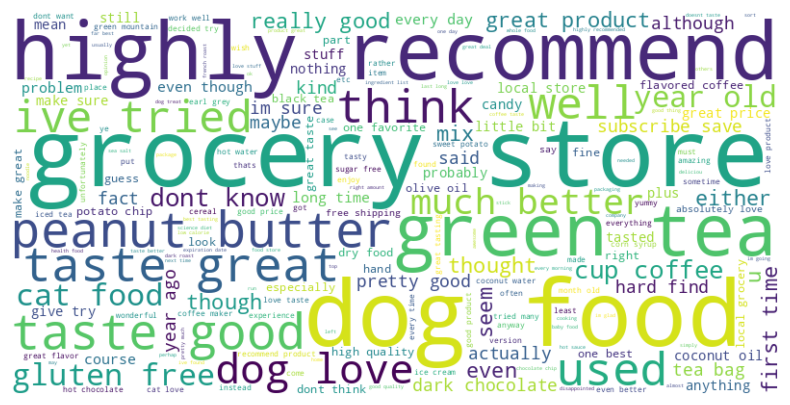

In [53]:
text_data = data['Text'].tolist()
plot_most_common_words_bar_chart(text_data)
create_word_cloud(text_data)

In [44]:
# first_50_texts = data['Text'].head(50)

# # Print each text individually
# for idx, text in enumerate(first_50_texts):
#     print(f"{text}")

In [ ]:
# Preprocess the text data
text_data = data['Text']
vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=5000, stop_words='english')
tf = vectorizer.fit_transform(text_data)

# Model Selection

In [45]:
# Apply LDA
num_topics = 10  # Number of topics you want to identify
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42, n_jobs=-1)


In [46]:
lda.fit(tf)


LatentDirichletAllocation(n_jobs=-1, random_state=42)

# Examining Results

In [47]:
# Get the top words for each topic
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = f"Topic #{topic_idx + 1}: "
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)

n_top_words = 10  # Number of top words to display for each topic
feature_names = vectorizer.get_feature_names_out()
print_top_words(lda, feature_names, n_top_words)


Topic #1: tea flavor green taste like good bag love drink cup
Topic #2: like flavor taste chip bar good chocolate snack sweet bag
Topic #3: coffee cup like flavor taste good strong great blend roast
Topic #4: food product ingredient cat organic health diet natural formula brand
Topic #5: dog food treat cat love like eat old good little
Topic #6: amazon product price store box order great buy good time
Topic #7: taste like drink water flavor sugar product good bottle juice
Topic #8: like flavor sauce taste hot salt good chocolate make use
Topic #9: product use oil time work like day smell dont hair
Topic #10: great taste make love good like mix cooky cereal milk


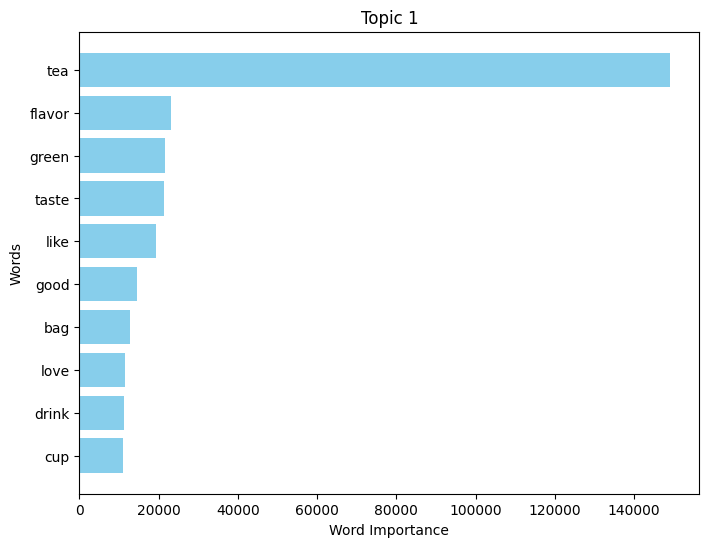

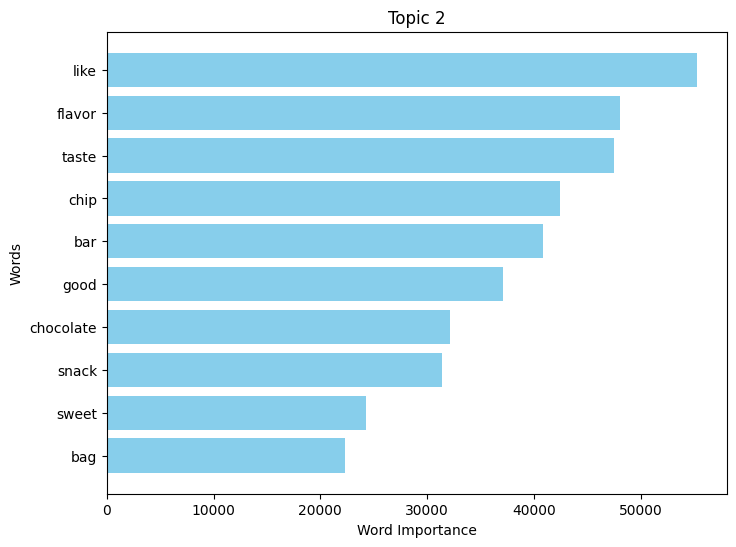

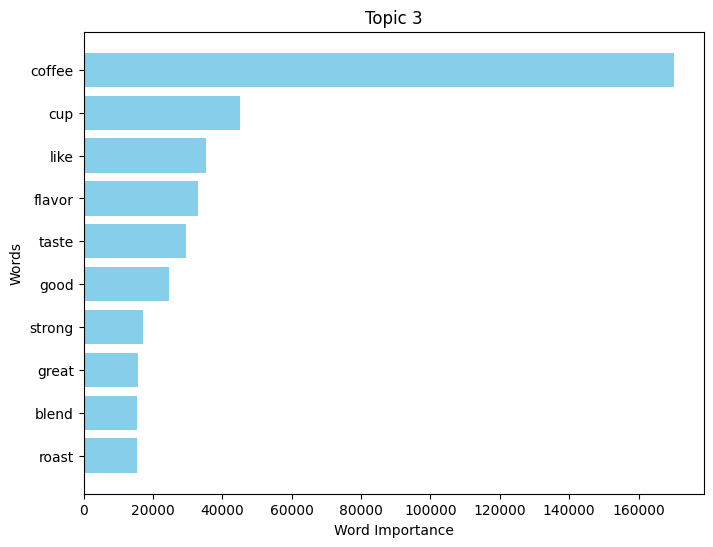

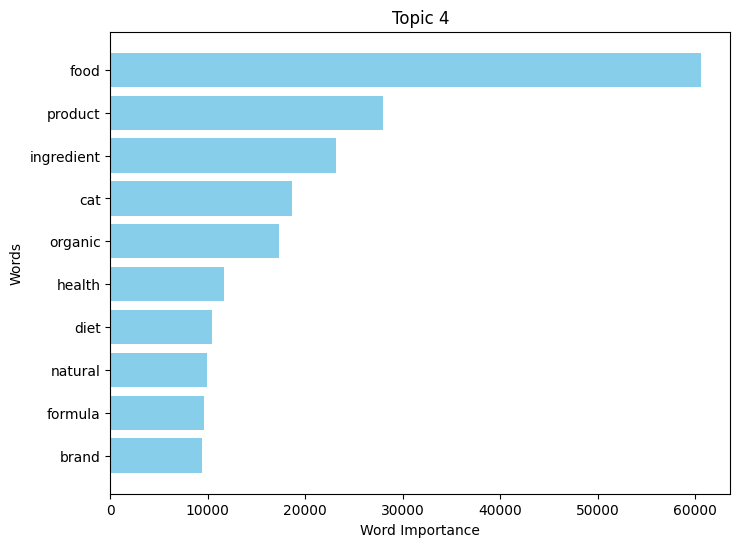

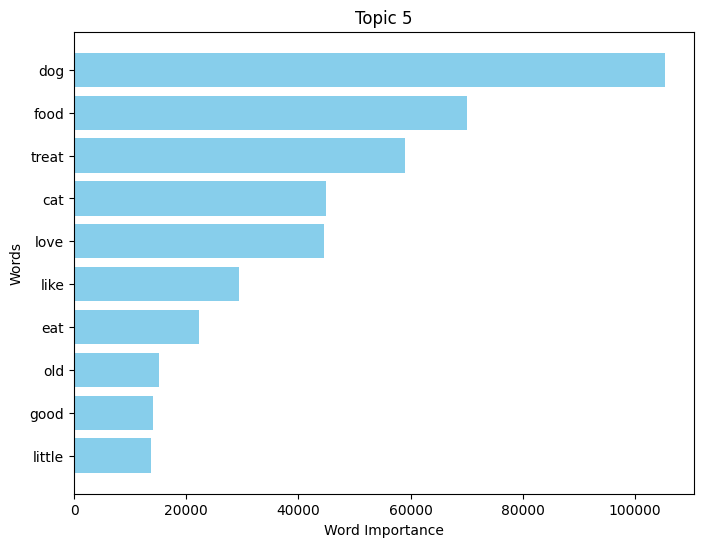

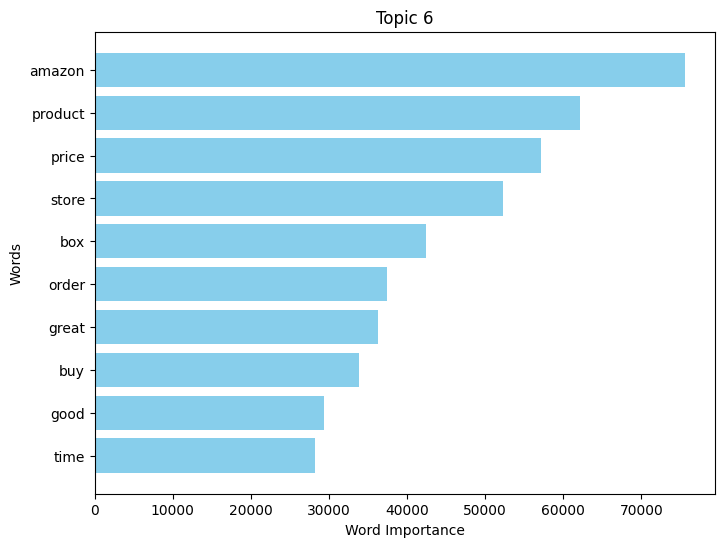

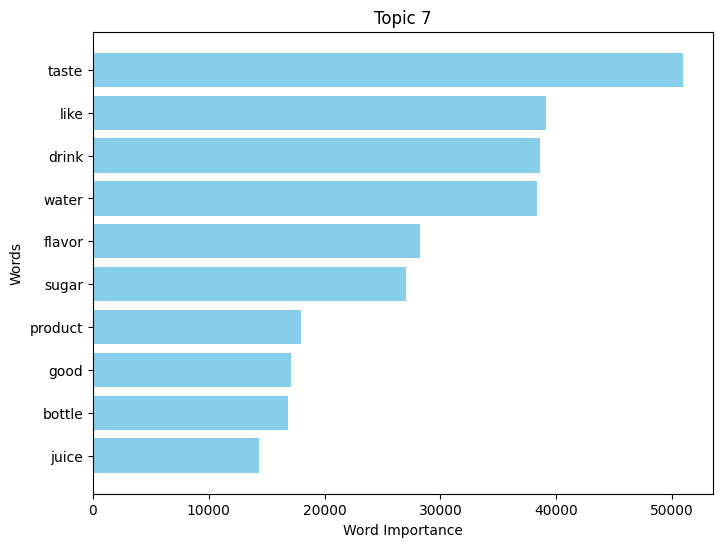

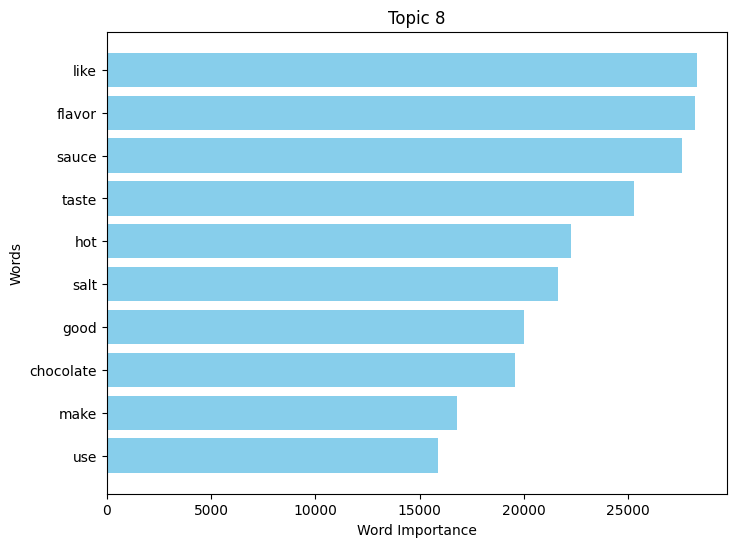

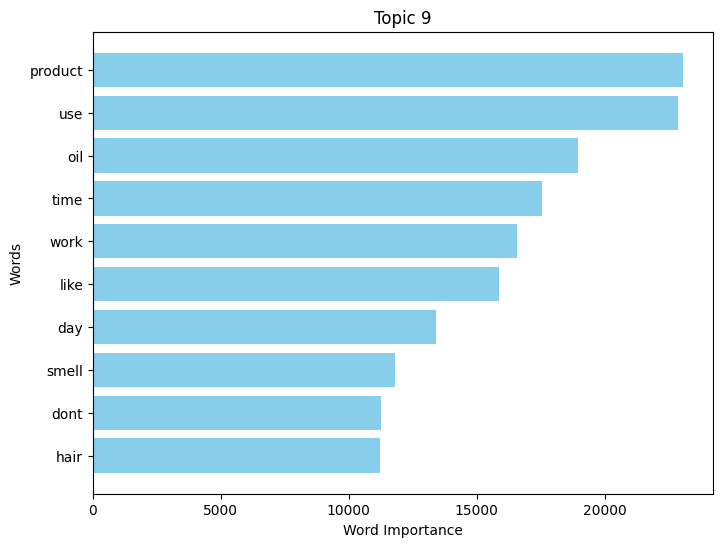

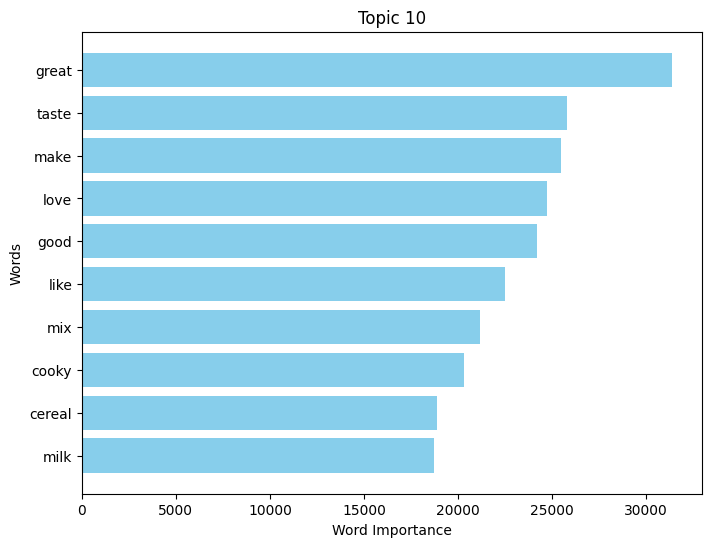

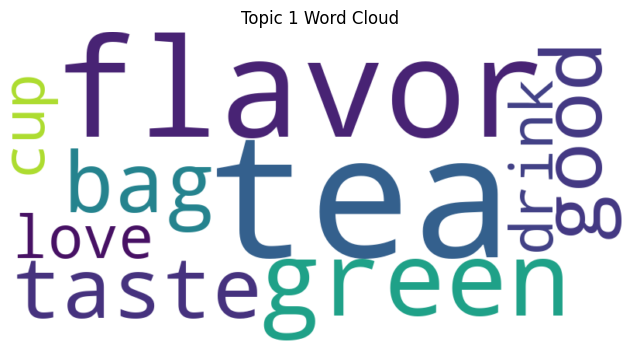

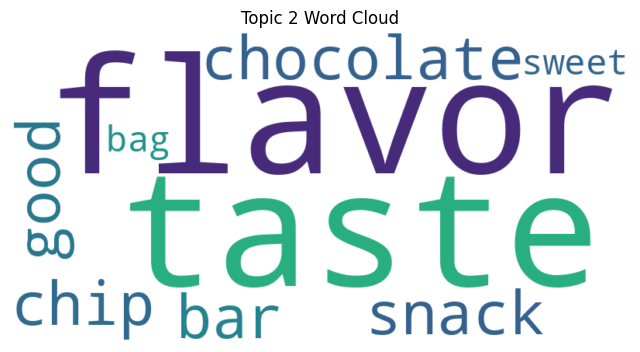

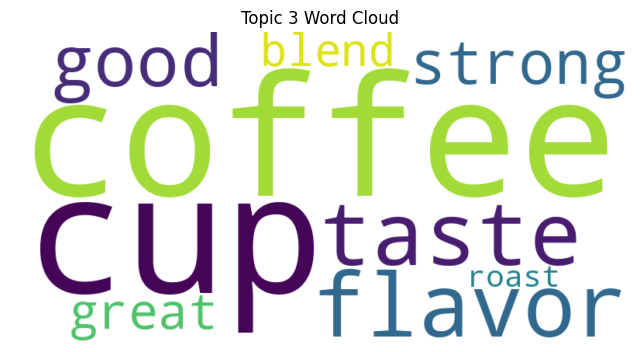

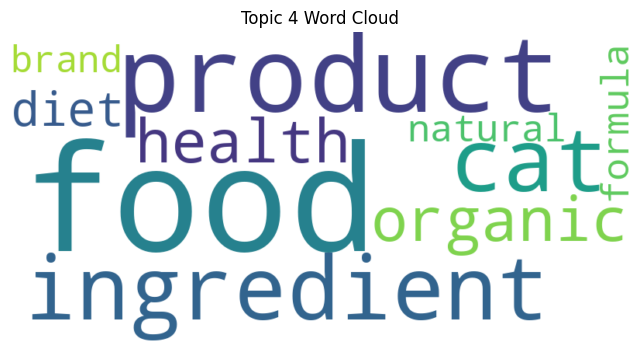

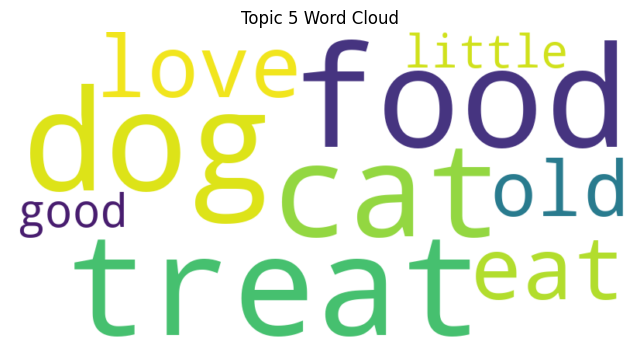

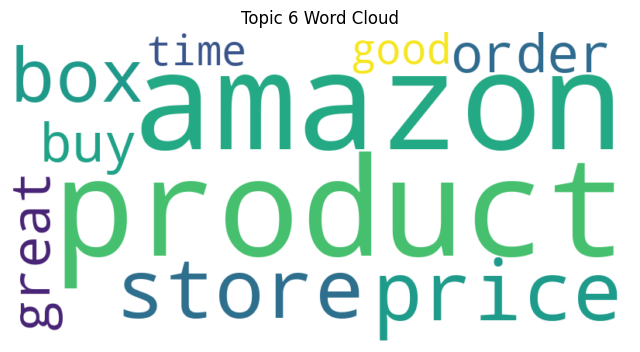

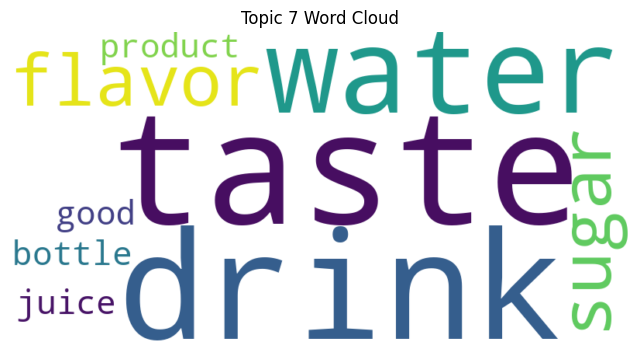

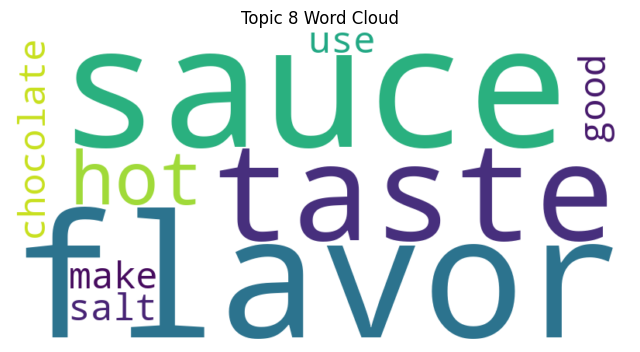

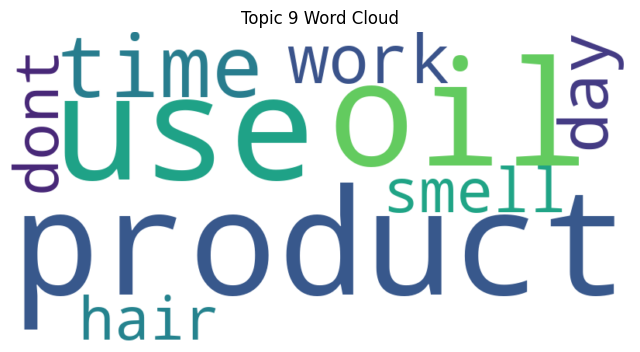

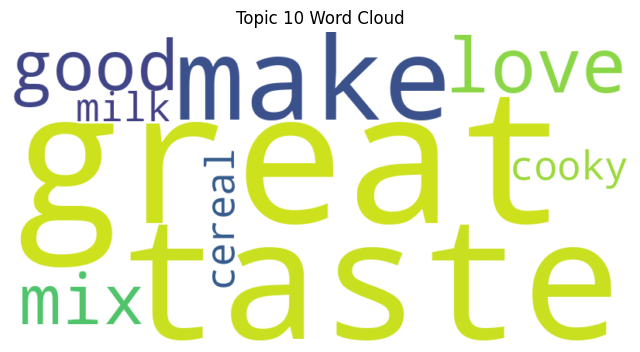

In [50]:
# Function to get the most important words for each topic
def get_most_important_words(vectorizer, lda_model, n_words=10):
    words = vectorizer.get_feature_names_out()
    topics = []
    for topic_weights in lda_model.components_:
        top_word_indices = topic_weights.argsort()[-n_words:][::-1]
        topic_words = [words[i] for i in top_word_indices]
        topics.append(topic_words)
    return topics

# Get the most important words for each topic
topic_words = get_most_important_words(vectorizer, lda, n_words=10)

# Plotting most frequently occurring words as a bar chart for each topic
for i, topic in enumerate(topic_words):
    plt.figure(figsize=(8, 6))
    plt.barh(topic, lda.components_[i][lda.components_[i].argsort()[-10:]][::-1], color='skyblue')
    plt.xlabel('Word Importance')
    plt.ylabel('Words')
    plt.title(f'Topic {i + 1}')
    plt.gca().invert_yaxis()
    plt.show()

# Creating and displaying the word cloud for each topic
for i, topic in enumerate(topic_words):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(topic))
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Topic {i + 1} Word Cloud')
    plt.show()